In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import pickle

In [2]:
df=pd.read_csv("rainfall.csv")
df

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0


In [3]:
df.shape

(1781, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          1781 non-null   object 
 1   temp              1781 non-null   float64
 2   dew               1781 non-null   float64
 3   humidity          1781 non-null   float64
 4   sealevelpressure  1781 non-null   float64
 5   winddir           1781 non-null   float64
 6   solarradiation    1781 non-null   float64
 7   windspeed         1781 non-null   float64
 8   precipprob        1781 non-null   int64  
 9   preciptype        1781 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 139.3+ KB


In [5]:
if df['precipprob'].equals(df['preciptype']):
    print("Both columns are equal")
else:
    print("Both columns are different")   # Checking whether both the columns are same only or not

Both columns are different


In [6]:
print(df['precipprob'].value_counts())
print(df['preciptype'].value_counts())

precipprob
0      968
100    813
Name: count, dtype: int64
preciptype
0    968
1    813
Name: count, dtype: int64


In [7]:
df['precipprob'].replace({100:1},inplace=True)

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_1068\725026010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['precipprob'].replace({100:1},inplace=True)


In [8]:
if df['precipprob'].equals(df['preciptype']):
    print("Both columns are equal")
else:
    print("Both columns are different") # Now checking again

Both columns are equal


So this indicates that the 'preciptype' is the target column and precipprob is just 'preciptype'*100. So removing 'precipprob' column

In [9]:
df.drop(columns=['precipprob'],inplace=True)
df=df.rename(columns={'preciptype':'rained'})

In [10]:
df.isnull().sum()   # No missing values are there

datetime            0
temp                0
dew                 0
humidity            0
sealevelpressure    0
winddir             0
solarradiation      0
windspeed           0
rained              0
dtype: int64

Extracting day,month,year from 'datetime' column and making them as separate columns and also dropping the 'datetime' column

In [11]:
df["datetime"]=pd.to_datetime(df["datetime"],format="%d-%m-%Y")
df["day"]=pd.to_datetime(df["datetime"]).dt.day
df["month"]=pd.to_datetime(df["datetime"]).dt.month
df["year"]=pd.to_datetime(df["datetime"]).dt.year
df.drop(columns=['datetime'],inplace=True)

In [12]:
df.corr()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,rained,day,month,year
temp,1.000000,0.520488,0.102665,-0.324380,0.227890,0.218601,0.089735,0.133233,0.047543,0.156920,0.016387
dew,0.520488,1.000000,0.896037,-0.771936,0.464621,-0.102272,0.290859,0.630905,-0.012958,0.248627,0.094940
humidity,0.102665,0.896037,1.000000,-0.771251,0.411046,-0.258050,0.306392,0.700770,-0.026688,0.230362,0.097018
sealevelpressure,-0.324380,-0.771936,-0.771251,1.000000,-0.395296,0.253999,-0.394549,-0.670711,-0.008259,-0.199085,-0.083076
winddir,0.227890,0.464621,0.411046,-0.395296,1.000000,0.270943,0.386694,0.224053,0.005622,-0.252414,-0.060178
solarradiation,0.218601,-0.102272,-0.258050,0.253999,0.270943,1.000000,0.058174,-0.390645,0.041207,-0.370339,-0.051659
windspeed,0.089735,0.290859,0.306392,-0.394549,0.386694,0.058174,1.000000,0.249963,-0.036544,-0.083668,0.071618
rained,0.133233,0.630905,0.700770,-0.670711,0.224053,-0.390645,0.249963,1.000000,-0.047015,0.296425,0.079148
day,0.047543,-0.012958,-0.026688,-0.008259,0.005622,0.041207,-0.036544,-0.047015,1.000000,-0.000197,-0.010988
month,0.156920,0.248627,0.230362,-0.199085,-0.252414,-0.370339,-0.083668,0.296425,-0.000197,1.000000,-0.057703


In [13]:
cols=df.columns

EDA

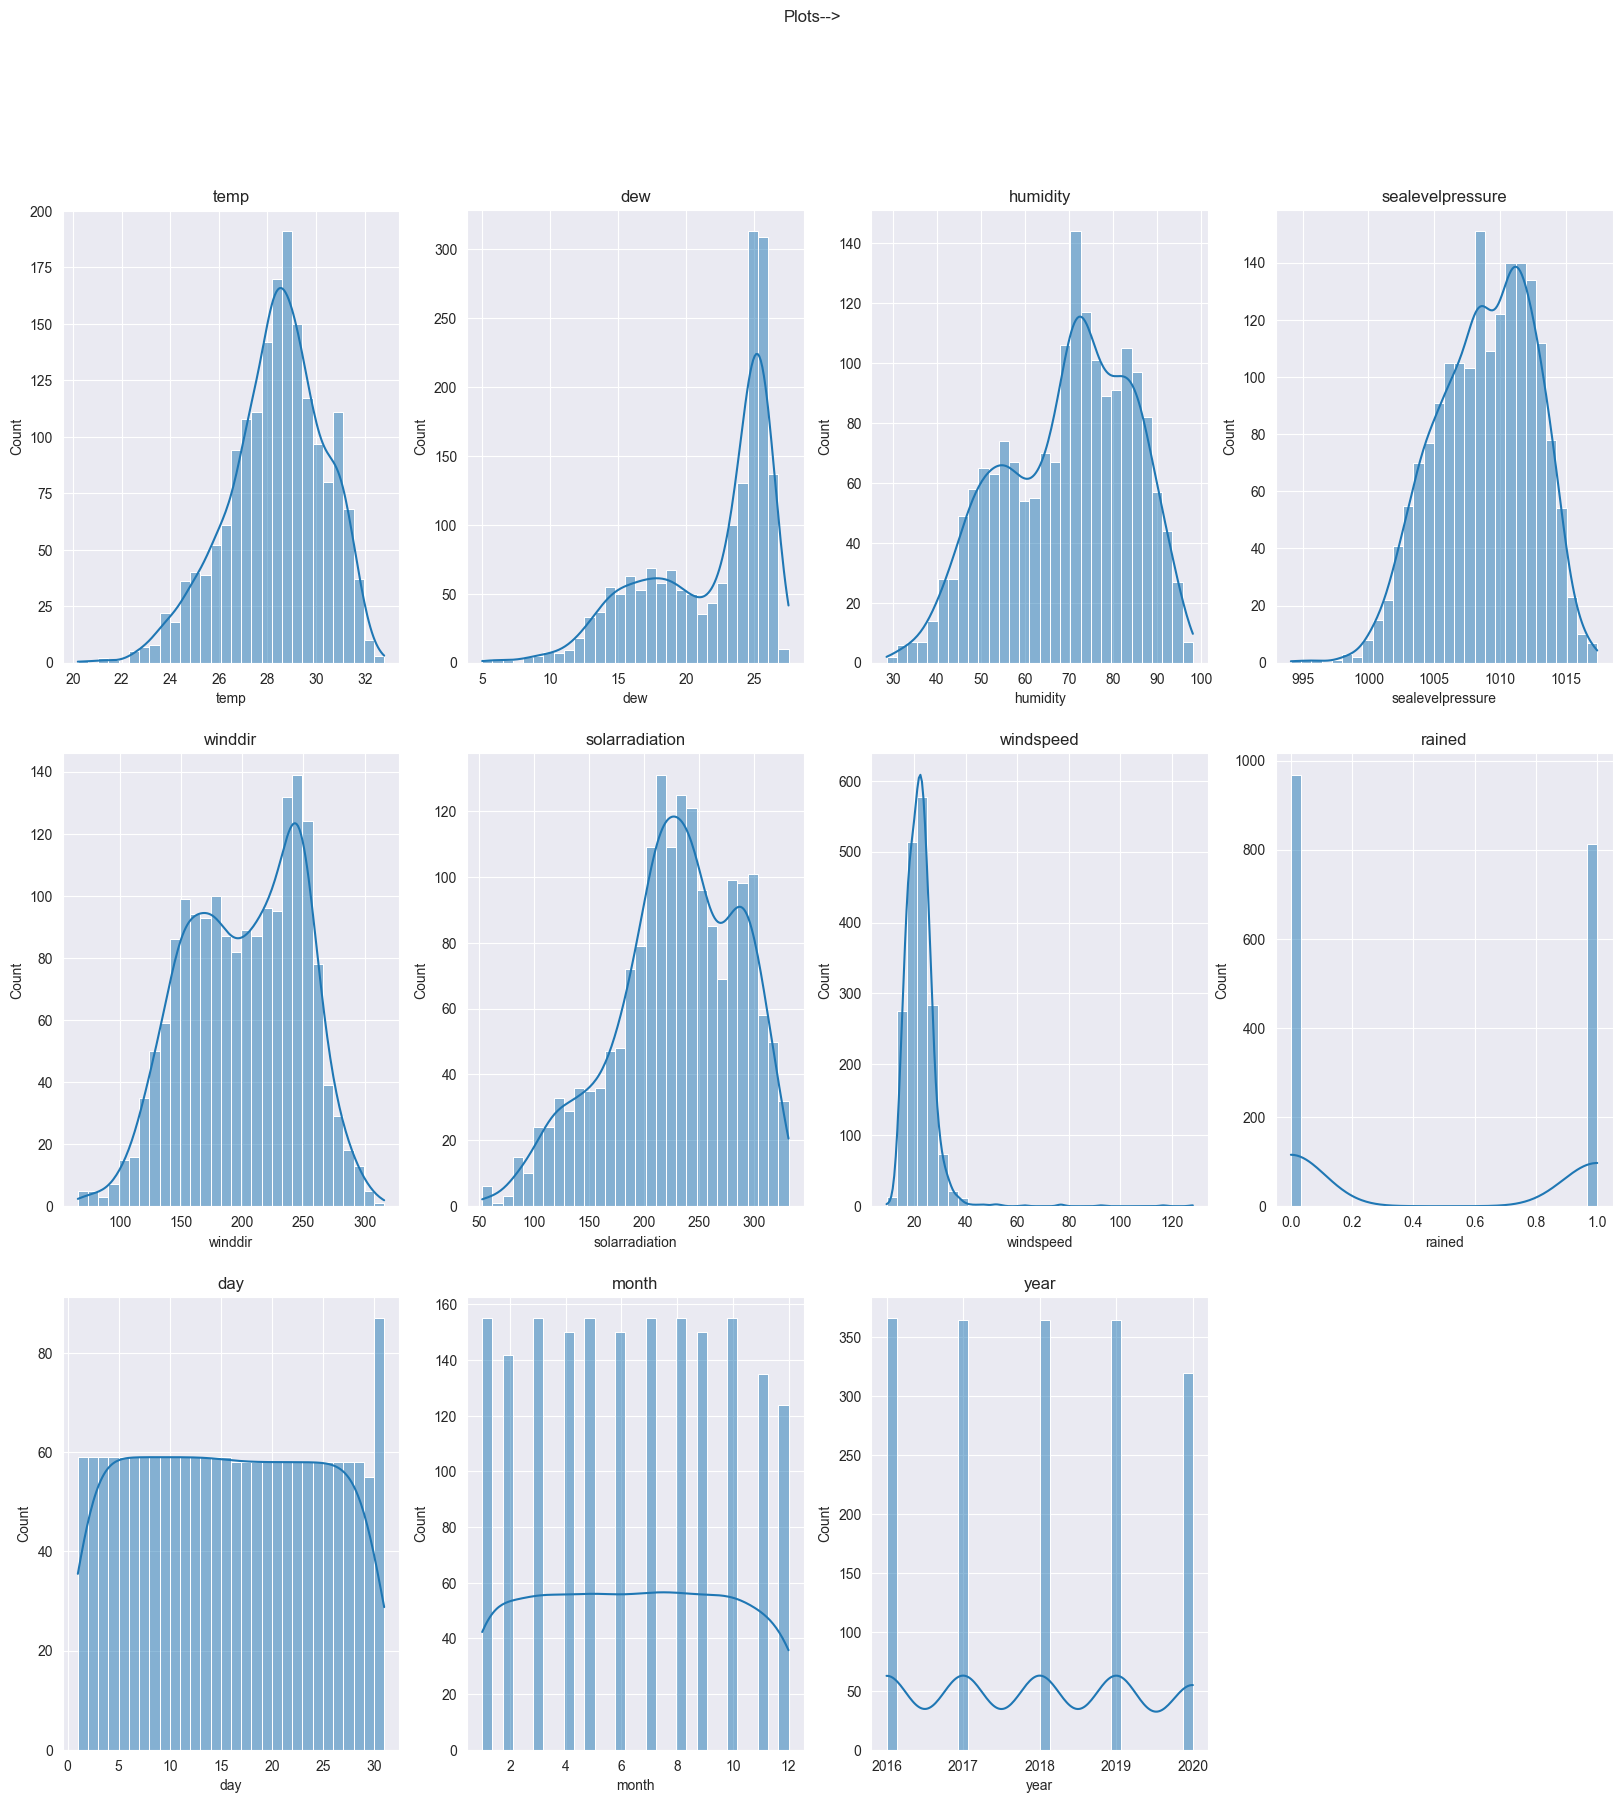

In [14]:
plt.figure(figsize=(20,20))
sns.set_style(style='darkgrid')
plt.suptitle("Plots-->")

for i,col in enumerate(cols,1):
    plt.subplot(3,4,i)
    sns.histplot(data=df,x=col,bins=30,kde=True)
    plt.title(col)

plt.show()

In [15]:
X=df.drop(columns=['rained'])
y=df['rained']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1602, 10), (179, 10), (1602,), (179,))

In [17]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred_rf=model_rf.predict(X_test)

In [19]:
report=classification_report(y_test,y_pred_rf)
print(report)    # As we can see, we have achieved 96% accuracy

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.90      0.95        80

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.95       179



Creating Pipeline

In [20]:
trf1=ColumnTransformer(transformers=[
    ('scale',StandardScaler(),slice(0,9))
],remainder='passthrough')
trf2=RandomForestClassifier()

In [21]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [22]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 9, None))])),
                ('trf2', RandomForestClassifier())])

In [ ]:
with open("rainfall_model.pkl","wb") as f:
    pickle.dump(pipe,f)